<a href="https://colab.research.google.com/github/HimanshuPathak2725/Neural_Style_Transfer_Tensorflow/blob/main/styleImageTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import PIL.Image
from tensorflow.keras import Model
import cv2

In [2]:
from tensorflow.keras.applications.vgg19 import VGG19

# Create a VGG19 model instance with pre-trained 'imagenet' weights
vgg19_model = VGG19(include_top=True, weights='imagenet')

# You can now use the vgg19_model for tasks like prediction or feature extraction.
# For example, to see the model summary:
vgg19_model.summary()

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from tensorflow.keras import layers

class GramLayer(layers.Layer):
    def call(self, input_tensor):
        result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
        gram_matrics = tf.expand_dims(result, axis=0)
        input_shape = tf.shape(input_tensor)
        i_j = tf.cast(input_shape[1]*input_shape[2], tf.float32)
        return gram_matrics/i_j

In [4]:
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg19 import preprocess_input

def load_vgg():
  vgg19_model = VGG19(include_top=False, weights='imagenet')
  vgg19_model.trainable = False

  content_layers = ['block5_conv2']
  style_layers = ['block1_conv1',
                  'block2_conv1',
                  'block3_conv1',
                  'block4_conv1',
                  'block5_conv1']

  content_output = [vgg19_model.get_layer(content_layer).output for content_layer in content_layers]
  style_output = [vgg19_model.get_layer(style_layer).output for style_layer in style_layers]

  gram_layer = GramLayer()
  gram_style_output = [gram_layer(output) for output in style_output]

  model = Model([vgg19_model.input], [content_output, gram_style_output])

  return model

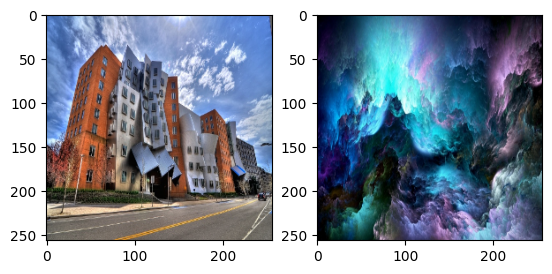

In [5]:
%matplotlib inline

content_image = cv2.resize(cv2.imread('/content/drive/MyDrive/Colab Notebooks/StyleImage/stata.jpg'), (256, 256))
content_image = tf.image.convert_image_dtype(content_image, tf.float32)
style_image = cv2.resize(cv2.imread('/content/drive/MyDrive/Colab Notebooks/StyleImage/Screenshot_20-7-2025_211233_www.bing.com.jpeg'), (256, 256))
style_image = tf.image.convert_image_dtype(style_image, tf.float32)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(np.array(content_image), cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(np.array(style_image), cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

In [7]:
def loss_object(style_outputs, content_outputs, style_targets, content_targets):
  style_weight = 1e-2
  content_weight = 1e-4
  content_loss = tf.add_n([tf.reduce_mean((output_ - target_)**2) for output_, target_ in zip(content_outputs, content_targets)])
  style_loss = tf.add_n([tf.reduce_mean((output_ - target_)**2) for output_, target_ in zip(style_outputs, style_targets)])
  total_loss = content_weight*content_loss + style_weight*style_loss

  return total_loss

In [8]:
vgg_model = load_vgg()
content_targets = vgg_model(np.array([content_image*255]))[0]
style_targets = vgg_model(np.array([style_image*255]))[1]

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_26']
Received: inputs=Tensor(shape=(1, 256, 256, 3))
  warnings.warn(msg)


In [9]:
def train_step(image, epoch):
  with tf.GradientTape() as tape:
    outputs = vgg_model(image*255)
    loss = loss_object(outputs[1], outputs[0], style_targets, content_targets)
  gradient = tape.gradient(loss, image)
  opt.apply_gradients([(gradient, image)])
  image.assign(tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0))

  if epoch % 100 == 0:
    tf.print("Epoch: {} Loss: {}".format(epoch, loss))

In [10]:
EPOCHS = 10
image = tf.image.convert_image_dtype(content_image, tf.float32)
image = tf.Variable([image])
for epoch in range(EPOCHS):
  train_step(image, epoch)

Epoch: 0 Loss: 2352080640.0


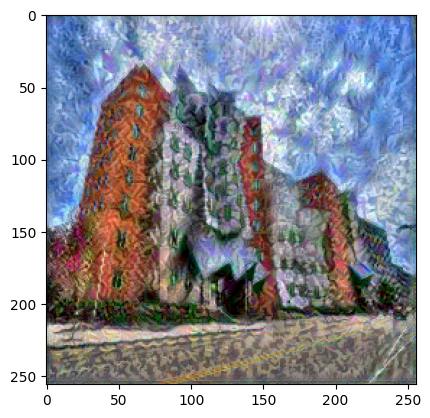

In [11]:
import PIL
tensor = image*255
tensor = np.array(tensor, dtype=np.uint8)
if np.ndim(tensor)>3:
  assert tensor.shape[0] == 1
tensor = tensor[0]
tensor = PIL.Image.fromarray(tensor)
plt.imshow(cv2.cvtColor(np.array(tensor), cv2.COLOR_BGR2RGB))
plt.show()